# Regression Trees

### Creating a quadratic dataset

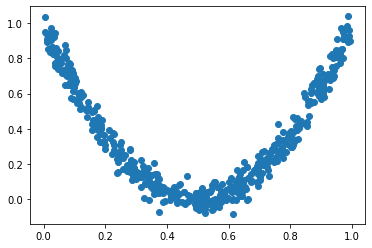

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 500
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
# Adding noise
y = y + np.random.randn(m, 1) / 20
plt.scatter(X, y)


In [21]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

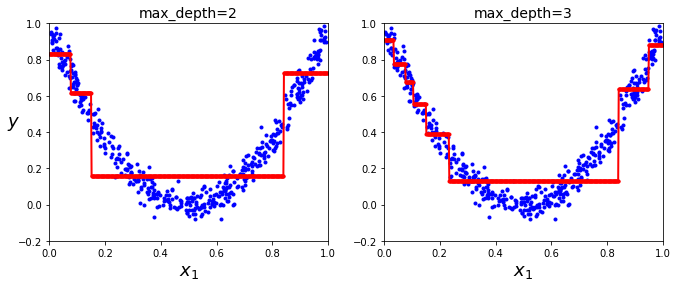

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)


plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.title("max_depth=3", fontsize=14)

plt.show()


In [23]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg1,
        out_file="regression_tree_2.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

export_graphviz(
        tree_reg2,
        out_file="regression_tree_3.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )